In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("ex2data2.txt")
data

,0.051267,0.69956,1
0,-0.092742,0.684940,1
1,-0.213710,0.692250,1
2,-0.375000,0.502190,1
3,-0.513250,0.465640,1
4,-0.524770,0.209800,1
...,...,...,...
112,-0.720620,0.538740,0
113,-0.593890,0.494880,0
114,-0.484450,0.999270,0
115,-0.006336,0.999270,0


In [4]:
data = pd.read_csv("ex2data2.txt",names=["test1","test2","accepted"])
data.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


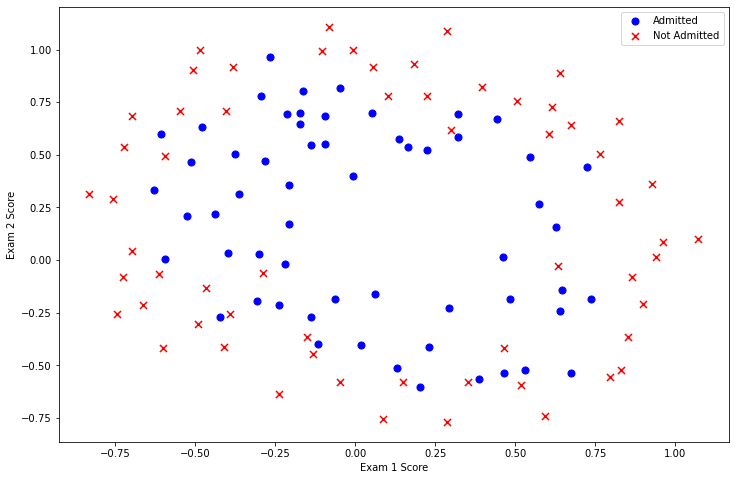

In [5]:
positive = data[data['accepted']==1]
negative = data[data['accepted']==0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['test1'], positive['test2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['test1'], negative['test2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

In [6]:
# def normalization(x):
#     return ((x-x.min())/(x.max()-x.min()))

In [7]:
# data2=normalization(data[["exam 1","exam 2"]])
# data2.describe()

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(data[["test1","test2"]],data[["accepted"]],random_state=1,train_size=0.7)

In [9]:
def feature_mapping(x1,x2,power):
    fea_dict={}
    for i in range(power+1):
        for j in range(power-i+1):
            fea_dict[f"F{i}{j}"]=np.power(x1,i)*np.power(x2,j)
    return pd.DataFrame(fea_dict)

In [10]:
data_mapping=feature_mapping(X_train["test1"],X_train["test2"],6)
data_mapping

,F00,F01,F02,F03,F04,F05,F06,F10,F11,F12,...,F30,F31,F32,F33,F40,F41,F42,F50,F51,F60
32,1.0,0.648390,0.420410,0.272589,1.767442e-01,1.145992e-01,7.430497e-02,-0.173390,-0.112424,-0.072895,...,-0.005213,-0.003380,-0.002192,-0.001421,0.000904,0.000586,3.799871e-04,-1.567185e-04,-1.016147e-04,2.717342e-05
110,1.0,-0.418860,0.175444,-0.073486,3.078049e-02,-1.289272e-02,5.400243e-03,-0.599650,0.251169,-0.105205,...,-0.215622,0.090316,-0.037830,0.015845,0.129298,-0.054158,2.268450e-02,-7.753346e-02,3.247567e-02,4.649294e-02
38,1.0,-0.163010,0.026572,-0.004332,7.060850e-04,-1.150989e-04,1.876227e-05,0.062788,-0.010235,0.001668,...,0.000248,-0.000040,0.000007,-0.000001,0.000016,-0.000003,4.129858e-07,9.758504e-07,-1.590734e-07,6.127170e-08
19,1.0,0.633770,0.401664,0.254563,1.613343e-01,1.022488e-01,6.480225e-02,-0.478690,-0.303379,-0.192273,...,-0.109689,-0.069518,-0.044058,-0.027923,0.052507,0.033277,2.109020e-02,-2.513459e-02,-1.592955e-02,1.203168e-02
117,1.0,-0.030612,0.000937,-0.000029,8.781462e-07,-2.688181e-08,8.229060e-10,0.632650,-0.019367,0.000593,...,0.253216,-0.007751,0.000237,-0.000007,0.160197,-0.004904,1.501196e-04,1.013486e-01,-3.102482e-03,6.411816e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,1.0,-0.513890,0.264083,-0.135710,6.973980e-02,-3.583858e-02,1.841709e-02,0.131910,-0.067787,0.034835,...,0.002295,-0.001180,0.000606,-0.000311,0.000303,-0.000156,7.995603e-05,3.993821e-05,-2.052385e-05,5.268249e-06
72,1.0,-0.521200,0.271649,-0.141584,7.379342e-02,-3.846113e-02,2.004594e-02,0.828920,-0.432033,0.225176,...,0.569558,-0.296854,0.154720,-0.080640,0.472118,-0.246068,1.282506e-01,3.913480e-01,-2.039706e-01,3.243962e-01
12,1.0,-0.243420,0.059253,-0.014423,3.510953e-03,-8.546362e-04,2.080355e-04,0.638820,-0.155502,0.037852,...,0.260697,-0.063459,0.015447,-0.003760,0.166538,-0.040539,9.867941e-03,1.063880e-01,-2.589696e-02,6.796276e-02
107,1.0,-0.060673,0.003681,-0.000223,1.355133e-05,-8.221998e-07,4.988533e-08,-0.288590,0.017510,-0.001062,...,-0.024035,0.001458,-0.000088,0.000005,0.006936,-0.000421,2.553384e-05,-2.001734e-03,1.214512e-04,5.776804e-04


In [11]:
X=data_mapping.values.reshape(82,28)

In [12]:
Y=Y_train.values.reshape(82,1)

In [13]:
theta=np.full((28,1),0.0)

In [14]:
m=X.shape[0]

In [15]:
alpha=0.01

In [16]:
lambd=1

In [17]:
def sigmoid(a):
    return 1./(1+np.exp(-a))

In [18]:
hx=sigmoid(X.dot(theta))

In [19]:
def regularized_cost(hx,m,Y,lambd):
    return ((Y.T.dot(np.log(hx))+((1-Y).T).dot(np.log(1-hx)))/-m+(np.dot(theta[1:].T,theta[1:])*lambd/2*m))

In [20]:
cost_m=regularized_cost(hx,m,Y,1)
cost_m

array([[0.69314718]])

In [21]:
def regularizedDescent(X,Y,theta,m,alpha,iters,lambd):
    cost_iters=np.zeros((1,iters))
    for i in range(iters):
        cost_iters[0,i]=regularized_cost(sigmoid(X.dot(theta)),m,Y,lambd)
        theta=np.vstack([theta[0] - (X.T.dot( sigmoid ( X.dot ( theta ) ) - Y) * alpha / m)[0] , theta[1:]*( 1 - lambd / m * alpha ) - (X.T.dot( sigmoid ( X.dot ( theta ) ) - Y) * alpha / m)[1:] ] )
    return cost_iters,theta

In [22]:
cost1,theta1=regularizedDescent(X,Y,theta,m,0.01,100000,lambd)

In [23]:
def find_decision_boundary(power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, 1000)
    t2 = np.linspace(-1, 1.5, 1000)

    #找到平面上所有点值对，并做特征映射
    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power) #这是DataFrame
    
    
    inner_product = np.dot(mapped_cord.values, theta)

    decision = mapped_cord[np.abs(inner_product) < threshhold]

    return decision.F10, decision.F01


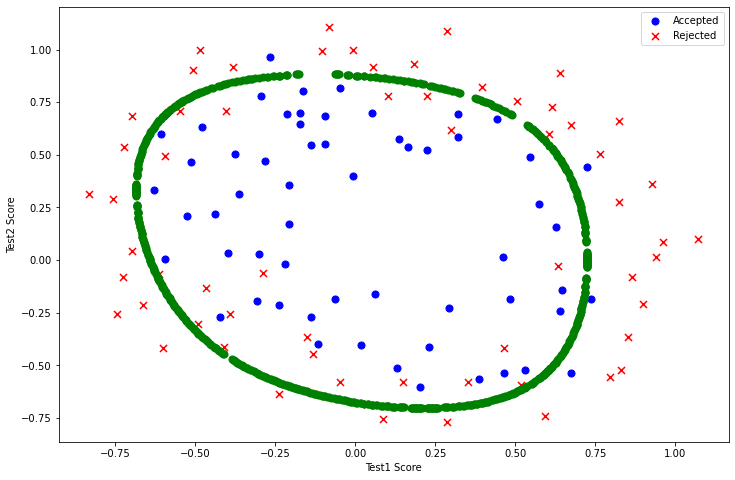

In [24]:
positive = data[data['accepted']==1]
negative = data[data['accepted']==0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['test1'], positive['test2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['test1'], negative['test2'], s=50, c='r', marker='x', label='Rejected')

test1,test2 = find_decision_boundary(6,theta1,2 * 10**-3)
ax.scatter(test1, test2, s=50, c='g', marker='o')
ax.legend()
ax.set_xlabel('Test1 Score')
ax.set_ylabel('Test2 Score')
plt.show()


In [25]:
hx2=sigmoid(X.dot(theta1))

In [26]:
def cost(hx,m,Y):
    return (Y.T.dot(np.log(hx))+((1-Y).T).dot(np.log(1-hx)))/-m

In [27]:
J_train=cost(hx2,m,Y)
J_train

array([[0.52110912]])

In [28]:
X3,X4=X_test["test1"],X_test["test2"]
data_mapping2=feature_mapping(X3,X4,6)

In [29]:
data_mapping2.head()

,F00,F01,F02,F03,F04,F05,F06,F10,F11,F12,...,F30,F31,F32,F33,F40,F41,F42,F50,F51,F60
94,1.0,0.99196,0.983985,0.976073,0.968226,0.960441,0.952719,-0.10426,-0.103422,-0.102590,...,-0.001133,-0.001124,-0.001115,-0.001106,0.000118,0.000117,0.000116,-0.000012,-0.000012,0.000001
54,1.0,0.17325,0.030016,0.005200,0.000901,0.000156,0.000027,-0.20795,-0.036027,-0.006242,...,-0.008992,-0.001558,-0.000270,-0.000047,0.001870,0.000324,0.000056,-0.000389,-0.000067,0.000081
59,1.0,0.77997,0.608353,0.474497,0.370094,0.288662,0.225148,0.22408,0.174776,0.136320,...,0.011251,0.008776,0.006845,0.005339,0.002521,0.001966,0.001534,0.000565,0.000441,0.000127
115,1.0,0.99927,0.998541,0.997812,0.997083,0.996355,0.995628,-0.48445,-0.484096,-0.483743,...,-0.113696,-0.113613,-0.113531,-0.113448,0.055080,0.055040,0.055000,-0.026684,-0.026664,0.012927
74,1.0,-0.74050,0.548340,-0.406046,0.300677,-0.222651,0.164873,0.59274,-0.438924,0.325023,...,0.208254,-0.154212,0.114194,-0.084561,0.123440,-0.091408,0.067687,0.073168,-0.054181,0.043370


In [30]:
X2=data_mapping2.values.reshape(36,28)

In [31]:
Y2=Y_test.values.reshape(36,1)

In [32]:
m2=X2.shape[0]

In [33]:
hx3=sigmoid(X2.dot(theta1))

In [40]:
J_test=-(np.dot(Y2.T,np.log(hx3))+np.dot((1-Y2).T,np.log(1-hx3)))/m2

In [41]:
J_test

array([[0.45670661]])

In [36]:
r1=sum([1 if i==j else 0 for i,j in zip([int(i) for i in Y_train.values],[int(i) for i in hx2>0.5])])

In [37]:
(m-r1)/m

0.21951219512195122

In [38]:
r2=sum([1 if i==j else 0 for i,j in zip([int(i) for i in Y_test.values],[int(i) for i in hx3>0.5])])

In [39]:
(m2-r2)/m2

0.16666666666666666